## Importing Libraries

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

## Data Crawling

In [2]:
df = pd.read_csv('full_rssi_d1_2f.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18180\4293142749.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('full_rssi_d1_2f.csv')


In [3]:
df.sample(5)

,start,stop,time,measurement,bssid,ap_type,band,building,ch_width,channel,crawler,floor,monitoring_ap,total_adjacent_aps,rssi,essid
143645,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-30 00:45:43.224904+00:00,adjacent-ap,2010fca65eb68cac8979d36e9675cc33b705265ec73cc8...,valid,2.4GHz,D1,20MHz,11,ARUBA,2F,D1_2F_AP14,120,93.0,NTUST-PEAP
76791,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-28 05:15:36.680098+00:00,adjacent-ap,bcc90c7b949a01c55b8237c437ca50bd37b129878405bc...,valid,2.4GHz,D1,20MHz,11,ARUBA,2F,D1_2F_AP23,131,62.0,eduroam
151128,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-28 11:45:37.648863+00:00,adjacent-ap,d8:c7:c8:78:a2:f1,suspected-rogue(100%),2.4GHz,D1,20MHz,11,ARUBA,2F,D1_2F_AP19,93,95.0,NTUST-PEAP
105713,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-28 18:45:38.456294+00:00,adjacent-ap,6fc741dafd425fba70d29421751f7de07e9c442a2ffb29...,valid,2.4GHz,D1,20MHz,11,ARUBA,2F,D1_2F_AP21,124,84.0,NTUST-PEAP
181060,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-29 18:45:42.268845+00:00,adjacent-ap,533b9623959b37bcb8d3d06428d8573e69b99cac308558...,valid,2.4GHz,D1,20MHz,6,ARUBA,2F,D1_2F_AP08,117,84.0,NTUST-PEAP


## Data Mapping

### Data with Valid AP Type

In [17]:
valid_df = df[df['ap_type'] == 'valid']

valid_df.sample(5)

,start,stop,time,measurement,bssid,ap_type,band,building,ch_width,channel,crawler,floor,monitoring_ap,total_adjacent_aps,rssi,essid
81799,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-29 11:15:41.219048+00:00,adjacent-ap,919068174e60bee678317656f3050f5fed9913a9b2c91b...,valid,2.4GHz,D1,20MHz,11,ARUBA,2F,D1_2F_AP26,79,67.0,sensor
255074,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-28 12:15:37.706320+00:00,adjacent-ap,318f8e5979850457116d9715c1c5eebbf321cef4c1fd52...,valid,5GHz,D1,80MHz,116E,ARUBA,2F,D1_2F_AP17,134,90.0,NTUST-UAM
183277,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-29 20:45:42.571714+00:00,adjacent-ap,8682d2e1310603ae060fff969f81bc7f86bc0a31560b3f...,valid,2.4GHz,D1,20MHz,6,ARUBA,2F,D1_2F_AP12,73,85.0,eduroam
290876,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-29 16:15:42.003438+00:00,adjacent-ap,fb52bfe84aaf881ec8c1433de7bf615c3ea54916333f55...,valid,5GHz,D1,80MHz,157E,ARUBA,2F,D1_2F_AP07,101,86.0,eduroam
182915,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-28 03:15:36.419148+00:00,adjacent-ap,bc6ba8429902c3a1e105ec3d23aec5afbde9f37cad8800...,valid,2.4GHz,D1,20MHz,6,ARUBA,2F,D1_2F_AP12,86,85.0,NTUST-UAM


In [18]:
valid_df.essid.unique()

array([nan, 'NTUST-PEAP', 'NTUST-UAM', 'eduroam', 'sensor'], dtype=object)

In [19]:
valid_df.dropna(subset=['essid'], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18180\1328826149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.dropna(subset=['essid'], inplace=True)


In [20]:
valid_df.shape

(277673, 16)

In [21]:
valid_df.time.unique()

array(['2024-07-29 15:45:41.995401+00:00',
       '2024-07-29 16:15:42.003438+00:00',
       '2024-07-30 01:45:43.397224+00:00',
       '2024-07-30 01:15:43.325532+00:00',
       '2024-07-29 02:45:39.725785+00:00',
       '2024-07-28 11:15:37.581032+00:00',
       '2024-07-28 13:45:37.919181+00:00',
       '2024-07-28 02:45:36.318637+00:00',
       '2024-07-28 17:45:38.354908+00:00',
       '2024-07-28 22:45:39.198366+00:00',
       '2024-07-28 12:45:37.806898+00:00',
       '2024-07-28 13:15:37.818402+00:00',
       '2024-07-28 11:45:37.648863+00:00',
       '2024-07-28 12:15:37.706320+00:00',
       '2024-07-28 09:45:37.357669+00:00',
       '2024-07-28 10:45:37.480370+00:00',
       '2024-07-28 10:15:37.458488+00:00',
       '2024-07-28 00:15:35.914613+00:00',
       '2024-07-28 20:15:38.706506+00:00',
       '2024-07-28 15:15:38.190188+00:00',
       '2024-07-29 01:15:39.503758+00:00',
       '2024-07-29 00:15:39.465928+00:00',
       '2024-07-29 00:45:39.485921+00:00',
       '202

In [22]:
valid_df.start.unique()

array(['2024-07-28 00:00:00+00:00'], dtype=object)

In [23]:
valid_df.stop.unique()

array(['2024-07-30 23:59:59+00:00'], dtype=object)

In [24]:
valid_df.dtypes

start                  object
stop                   object
time                   object
measurement            object
bssid                  object
ap_type                object
band                   object
building               object
ch_width               object
channel                object
crawler                object
floor                  object
monitoring_ap          object
total_adjacent_aps      int64
rssi                  float64
essid                  object
dtype: object

In [25]:
# Ensure the 'time' column is in datetime format
valid_df['time'] = pd.to_datetime(valid_df['time'])

unique_times = valid_df['time'].unique()

time_slot_dict = {}
for i, unique_time in enumerate(unique_times):
    date_str = unique_time.strftime('%d/%m/%y')
    time_slot_dict[unique_time] = f"{date_str}_Crawl{i+1}"

valid_df['crawl_time'] = valid_df['time'].map(time_slot_dict)

valid_df.sample(5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18180\2487872861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['time'] = pd.to_datetime(valid_df['time'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18180\2487872861.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['crawl_time'] = valid_df['time'].map(time_slot_dict)


,start,stop,time,measurement,bssid,ap_type,band,building,ch_width,channel,crawler,floor,monitoring_ap,total_adjacent_aps,rssi,essid,crawl_time
225683,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-29 06:15:40.391257+00:00,adjacent-ap,08a9e2ced83739d6fecddb34fbde74999730613a117614...,valid,5GHz,D1,80MHz,100E,ARUBA,2F,D1_2F_AP23,136,58.0,NTUST-PEAP,29/07/24_Crawl60
137348,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-29 23:45:43.052532+00:00,adjacent-ap,56feea65a0e73a3999919f3ccb092932ec15f716170d8e...,valid,2.4GHz,D1,20MHz,11,ARUBA,2F,D1_2F_AP02,108,92.0,NTUST-PEAP,29/07/24_Crawl26
280512,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-29 03:15:39.826464+00:00,adjacent-ap,5fb3c022cf13125a104086440a6680b0900b2793642ce4...,valid,5GHz,D1,80MHz,149E,ARUBA,2F,D1_2F_AP24,91,89.0,NTUST-UAM,29/07/24_Crawl59
139100,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-29 08:15:40.701944+00:00,adjacent-ap,8649165a09af521d89e4dbe071b467c9efe9ec7d29c098...,valid,2.4GHz,D1,20MHz,11,ARUBA,2F,D1_2F_AP15,190,92.0,NTUST-UAM,29/07/24_Crawl54
321584,2024-07-28 00:00:00+00:00,2024-07-30 23:59:59+00:00,2024-07-28 20:45:38.807102+00:00,adjacent-ap,8ed21e262e0f2bd1a9ea062a325c78aff681a5cf9ea0c3...,valid,5GHz,D1,80MHz,52E,ARUBA,2F,D1_2F_AP10,126,55.0,NTUST-UAM,28/07/24_Crawl63


In [26]:
valid_df.drop(columns=['start', 'stop', 'time', 'measurement', 'crawler', 'ap_type', 'total_adjacent_aps', 'building', 'floor', 'ch_width'], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18180\78689840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.drop(columns=['start', 'stop', 'time', 'measurement', 'crawler', 'ap_type', 'total_adjacent_aps', 'building', 'floor', 'ch_width'], inplace=True)


In [27]:
valid_df.sample(5)

,bssid,band,channel,monitoring_ap,rssi,essid,crawl_time
224419,721b1f10fa945c26216e44e898d0bba2a398d35c8396f8...,5GHz,100E,D1_2F_AP10,50.0,eduroam,28/07/24_Crawl19
252080,f2b235fe7bd40f410e20b06178e81218b9ed09cbba48c3...,5GHz,116E,D1_2F_AP23,86.0,NTUST-PEAP,28/07/24_Crawl71
304383,3bd310a9bf7ba9974ba6a4f094f67fda785c3867403543...,5GHz,36E,D1_2F_AP22,75.0,NTUST-UAM,28/07/24_Crawl12
145845,b08deb89e3a77070641e77512de8d438cfe7fc8b7d126e...,2.4GHz,11,D1_2F_AP10,93.0,eduroam,28/07/24_Crawl56
196775,3e5936795ee38b47f951a20ddd2508676dcf49d6c11b8a...,2.4GHz,6,D1_2F_AP16,89.0,sensor,29/07/24_Crawl26


In [28]:
valid_df.shape

(277673, 7)

In [29]:
valid_df.crawl_time.unique()

array(['29/07/24_Crawl1', '29/07/24_Crawl2', '30/07/24_Crawl3',
       '30/07/24_Crawl4', '29/07/24_Crawl5', '28/07/24_Crawl6',
       '28/07/24_Crawl7', '28/07/24_Crawl8', '28/07/24_Crawl9',
       '28/07/24_Crawl10', '28/07/24_Crawl11', '28/07/24_Crawl12',
       '28/07/24_Crawl13', '28/07/24_Crawl14', '28/07/24_Crawl15',
       '28/07/24_Crawl16', '28/07/24_Crawl17', '28/07/24_Crawl18',
       '28/07/24_Crawl19', '28/07/24_Crawl20', '29/07/24_Crawl21',
       '29/07/24_Crawl22', '29/07/24_Crawl23', '29/07/24_Crawl24',
       '29/07/24_Crawl25', '29/07/24_Crawl26', '30/07/24_Crawl27',
       '30/07/24_Crawl28', '30/07/24_Crawl29', '29/07/24_Crawl30',
       '29/07/24_Crawl31', '28/07/24_Crawl32', '28/07/24_Crawl33',
       '28/07/24_Crawl34', '28/07/24_Crawl35', '28/07/24_Crawl36',
       '28/07/24_Crawl37', '28/07/24_Crawl38', '28/07/24_Crawl39',
       '28/07/24_Crawl40', '28/07/24_Crawl41', '28/07/24_Crawl42',
       '28/07/24_Crawl43', '29/07/24_Crawl44', '29/07/24_Crawl45',
    

In [30]:
valid_df.bssid.unique()

array(['a438fbdfbf21196d8887d7d08f04b449f2fc5b8a9a49def6410095379b2367f8',
       '2213649b802971e505e611dea1dc770ce6e795f06584997a5161e1e5a8a3ae19',
       '54bd28bb25a3f853c35c2a4aeb2a2a9d4bd70e5967a6d57d81a00b3ca1af1527',
       '66443a61b36ccb251a1b295d19a042bda738e480f8dd732c24b3e649a05b7ce2',
       'fc68c0207dff3aed0b4e7411579422fa6fb9d4a2f35e43c944fab51aefef93ca',
       '339c1c44d251162940609b76b7db08176e25eabfcb2e4409ab1b4aeb58d7fe9d',
       '003035d85f473c62851d3d111b1816f77355a30bc00933211a7df63c74c5e6c9',
       '385723236164cae077dbeba7df3e604c1c495b4a98dae5eefa76475359fc35cb',
       '4ca07004a36650fbb637e92c4543904ab954d98f2ffa881b226b01edb26afc01',
       'f00bcad150ca938044714213d4d8fbcb686d5f084f273eda3c04761a073320fb',
       '8417cc2d3d946880a2a5c3ea67bf73e9914b74202433be926f54f2c02f29220d',
       'bffefd86908d54ca80f6839dac64cbeb35bfaad42ac459720e40dcedf6e968f7',
       'd2bb7b8183a4de514248ee89ec9e7461ffc9bcb1a51bdb6741d4d19913ab4caf',
       '279b83adfb18b6928

In [31]:
valid_df[(valid_df['bssid'] == '2213649b802971e505e611dea1dc770ce6e795f06584997a5161e1e5a8a3ae19') & (valid_df['monitoring_ap'] == 'D1_2F_AP28')]

,bssid,band,channel,monitoring_ap,rssi,essid,crawl_time
11859,2213649b802971e505e611dea1dc770ce6e795f0658499...,2.4GHz,1,D1_2F_AP28,68.0,NTUST-PEAP,30/07/24_Crawl99
13253,2213649b802971e505e611dea1dc770ce6e795f0658499...,2.4GHz,1,D1_2F_AP28,70.0,NTUST-PEAP,29/07/24_Crawl1
13254,2213649b802971e505e611dea1dc770ce6e795f0658499...,2.4GHz,1,D1_2F_AP28,70.0,NTUST-PEAP,29/07/24_Crawl2
13255,2213649b802971e505e611dea1dc770ce6e795f0658499...,2.4GHz,1,D1_2F_AP28,70.0,NTUST-PEAP,28/07/24_Crawl17
13256,2213649b802971e505e611dea1dc770ce6e795f0658499...,2.4GHz,1,D1_2F_AP28,70.0,NTUST-PEAP,29/07/24_Crawl93
...,...,...,...,...,...,...,...
16128,2213649b802971e505e611dea1dc770ce6e795f0658499...,2.4GHz,1,D1_2F_AP28,73.0,NTUST-PEAP,28/07/24_Crawl51
16129,2213649b802971e505e611dea1dc770ce6e795f0658499...,2.4GHz,1,D1_2F_AP28,73.0,NTUST-PEAP,28/07/24_Crawl37
16130,2213649b802971e505e611dea1dc770ce6e795f0658499...,2.4GHz,1,D1_2F_AP28,73.0,NTUST-PEAP,28/07/24_Crawl66
16131,2213649b802971e505e611dea1dc770ce6e795f0658499...,2.4GHz,1,D1_2F_AP28,73.0,NTUST-PEAP,28/07/24_Crawl71


### Pivot Data

In [33]:
pivot_df = valid_df.pivot_table(index=['crawl_time', 'essid', 'band', 'channel', 'bssid'], columns='monitoring_ap', values='rssi').reset_index()

pivot_df.columns = ['crawl_time', 'essid', 'band', 'channel', 'bssid'] + ['rssi_' + col for col in pivot_df.columns[5:]]

pivot_df.sample(5)

,crawl_time,essid,band,channel,bssid,rssi_D1_2F_AP01,rssi_D1_2F_AP02,rssi_D1_2F_AP03,rssi_D1_2F_AP04,rssi_D1_2F_AP05,...,rssi_D1_2F_AP19,rssi_D1_2F_AP20,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28
2259,28/07/24_Crawl12,NTUST-UAM,5GHz,149E,d2b6bd3569bac3fb55a61c72010866151083bdbf7b6dd6...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7603,28/07/24_Crawl18,NTUST-UAM,2.4GHz,1,1c70373a1370764aefd56e6efc02ba9af42c286c2c9e20...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58121,29/07/24_Crawl44,NTUST-PEAP,2.4GHz,11,ec37b766a9d749329abe714386837800db37fa1f473fbc...,NaN,65.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84799,29/07/24_Crawl90,eduroam,5GHz,44E,9bf4b86833e6b1450b3c380848d5effa173d327bf55936...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61629,29/07/24_Crawl47,sensor,2.4GHz,11,55e623ab7dcffd362dcd0d997957bdeacf65dd85ddd0f3...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Generate the list of columns to check for missing values
columns_to_check = [f'rssi_D1_2F_AP{str(i).zfill(2)}' for i in range(1, 29)]

# Build the condition dynamically
condition = pivot_df[columns_to_check].isna().all(axis=1)

# Filter the DataFrame using the condition
missing_rssi = pivot_df[condition]

# Display the filtered DataFrame
missing_rssi.shape

(0, 33)

### SHA256 Decrypt

In [41]:
import hashlib
import pandas as pd
import json

In [42]:
# Load the JSON data
with open('AP BSS Table.json', 'r') as file:
    bss_data = json.load(file)

In [43]:
# Extract the BSS table list from the JSON data
bss_list = bss_data["Aruba AP BSS Table"]

# Convert BSS data to DataFrame
bss_df = pd.DataFrame(bss_list)

In [44]:
bss_df.sample(5)

,acl,acl-state,ap name,band/ht-mode/bandwidth,bss,ch/EIRP/max-EIRP,cluster,cur-cl,datazone,ess,flags,fm,in-t(s),ip,mtu,port,tot-t,type
5364,2,-,D1_4F_AP19,5GHz/HE/80MHz,d0:d3:e0:2e:19:b1,100E/25.2/25.2,None,6,no,NTUST-PEAP,T,T,0,10.118.11.109,1500,N/A,257d:4h:3m:4s,ap
4907,2,-,TR_8F_AP810,5GHz/HE/80MHz,48:b4:c3:3b:d2:f1,116E/26.7/26.7,None,0,no,NTUST-PEAP,T,T,0,10.118.217.85,1500,N/A,53d:15h:54m:54s,ap
2477,2,-,D1_3F_AP30,2.4GHz/HT/20MHz,d0:d3:e0:2e:4f:61,1/12.0/25.5,None,0,no,NTUST-PEAP,-,T,0,10.118.11.80,1500,N/A,360d:0h:13m:27s,ap
670,102,-,TR_9F_AP926,5GHz/HE/80MHz,48:b4:c3:df:2e:33,108E/27.0/29.0,None,0,no,NTUST-UAM,T,T,0,10.118.217.93,1500,N/A,53d:15h:54m:34s,ap
2350,2,-,D1_3F_AP29,2.4GHz/HT/20MHz,d0:d3:e0:2e:c0:a1,6/12.0/26.5,None,0,no,NTUST-PEAP,-,T,0,10.118.11.79,1500,N/A,360d:0h:13m:26s,ap


In [45]:
# Function to compute SHA256 hash
def compute_sha256(value):
    return hashlib.sha256(value.encode()).hexdigest()

# Apply hash function to the 'bss' column in bss_df
bss_df['bss_hash'] = bss_df['bss'].apply(compute_sha256)

In [46]:
bss_df[['bss_hash', 'bss']].head(5)

,bss_hash,bss
0,c7b040e2c4cb7d56f7595b19dede1b0a5d87a58e8a565e...,d0:d3:e0:2e:56:04
1,e686f59be5605f048c3c8f526eb5e88ba0fca6518a247f...,d0:d3:e0:2e:54:44
2,4ad4017459c288de3fd44adfd73b9890aea6c2944cfea6...,d0:d3:e0:2e:54:c4
3,c43278e7ae41e2004222d99d008dbd150750ccd3d45a0b...,a0:25:d7:e6:bf:90
4,c8b2af05083d98a5ed00998e925c085fc4410f26a8e526...,b4:5d:50:c6:5a:71


In [49]:
pivot_df['bssid_hash'] = pivot_df['bssid']

# Merge dataframes on the hash column
merged_df = pd.merge(pivot_df, bss_df[['bss_hash', 'ap name']], left_on='bssid_hash', right_on='bss_hash', how='left')

# Drop unnecessary columns for clarity
pivot_df = merged_df.drop(columns=['bss_hash'])

pivot_df.rename(columns={'ap name': 'ap_name'}, inplace=True)

pivot_df.sample(5)

,crawl_time,essid,band,channel,bssid,rssi_D1_2F_AP01,rssi_D1_2F_AP02,rssi_D1_2F_AP03,rssi_D1_2F_AP04,rssi_D1_2F_AP05,...,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28,bssid_hash,ap_name
23697,28/07/24_Crawl56,sensor,2.4GHz,1,e9f4c8d4a0b797aee3bc8bf30647b913791de4f6615c80...,65.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e9f4c8d4a0b797aee3bc8bf30647b913791de4f6615c80...,NaN
44746,29/07/24_Crawl1,sensor,2.4GHz,1,dc624b027886ac489762dc21de16eda2bc28d158f7fb98...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dc624b027886ac489762dc21de16eda2bc28d158f7fb98...,NaN
19160,28/07/24_Crawl41,sensor,2.4GHz,11,9d06b37e7a22d6d5226a6409c0b30adc90c3d03bdcbffe...,84.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,9d06b37e7a22d6d5226a6409c0b30adc90c3d03bdcbffe...,D1_3F_AP01
67104,29/07/24_Crawl54,eduroam,5GHz,157E,fb52bfe84aaf881ec8c1433de7bf615c3ea54916333f55...,NaN,NaN,NaN,NaN,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fb52bfe84aaf881ec8c1433de7bf615c3ea54916333f55...,D1_2F_AP11
73430,29/07/24_Crawl68,eduroam,2.4GHz,1,5bf4aa685d43fdcb87cee91d7747d8eca8ccda1e4d3fdb...,89.0,81.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5bf4aa685d43fdcb87cee91d7747d8eca8ccda1e4d3fdb...,D1_3F_AP03


In [50]:
pivot_df[pivot_df['ap_name'].notna()] # Filter rows with valid AP name

,crawl_time,essid,band,channel,bssid,rssi_D1_2F_AP01,rssi_D1_2F_AP02,rssi_D1_2F_AP03,rssi_D1_2F_AP04,rssi_D1_2F_AP05,...,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28,bssid_hash,ap_name
0,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,042cf589e493a1469b9268fe4dc0dfb14861a96209b14a...,NaN,NaN,NaN,NaN,NaN,...,NaN,90.0,81.0,72.0,54.0,NaN,NaN,NaN,042cf589e493a1469b9268fe4dc0dfb14861a96209b14a...,D1_2F_AP26
2,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,106607332bcb3d2aa6984a3006d2c0b31ba0688898f7ce...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106607332bcb3d2aa6984a3006d2c0b31ba0688898f7ce...,D1_3F_AP09
3,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,1e60a5fe3a6d9752e08c7fd4714898bed618fc889b3d5f...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,84.0,61.0,84.0,NaN,NaN,NaN,1e60a5fe3a6d9752e08c7fd4714898bed618fc889b3d5f...,D1_3F_AP31
4,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,1f137d03a9201bb1e0ee471ad53ebd49035cce3f3554d5...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1f137d03a9201bb1e0ee471ad53ebd49035cce3f3554d5...,D1_3F_AP11
5,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,2213649b802971e505e611dea1dc770ce6e795f0658499...,81.0,87.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,2213649b802971e505e611dea1dc770ce6e795f0658499...,D1_2F_AP27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96235,30/07/24_Crawl99,sensor,5GHz,52E,f7584ad6b9884bbefa245cffdf33d4b7b89c3f1edd7189...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f7584ad6b9884bbefa245cffdf33d4b7b89c3f1edd7189...,D1_3F_AP19
96236,30/07/24_Crawl99,sensor,5GHz,60E,15ceb6dcfd5785c76a429c43686459cba19c3047f4ba6f...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15ceb6dcfd5785c76a429c43686459cba19c3047f4ba6f...,D1_3F_AP08
96237,30/07/24_Crawl99,sensor,5GHz,60E,4b94ddb927807497f4847f4f95a7e52432a79ea1f9a462...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4b94ddb927807497f4847f4f95a7e52432a79ea1f9a462...,D1_4F_AP22
96238,30/07/24_Crawl99,sensor,5GHz,60E,df95c0fdd638236c1df51b34417816f88f2fa847d57ab7...,NaN,NaN,NaN,88.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,df95c0fdd638236c1df51b34417816f88f2fa847d57ab7...,D1_5F_AP05


In [51]:
pivot_df[pivot_df['ap_name'].isna()] # Filter rows with invalid AP name

,crawl_time,essid,band,channel,bssid,rssi_D1_2F_AP01,rssi_D1_2F_AP02,rssi_D1_2F_AP03,rssi_D1_2F_AP04,rssi_D1_2F_AP05,...,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28,bssid_hash,ap_name
1,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,04bfd1487e8ae4e5a4442f02ab65d6623fd451cfaf07d3...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04bfd1487e8ae4e5a4442f02ab65d6623fd451cfaf07d3...,NaN
8,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,39167e40849b073e247825d6b998ed9f5bd8c9e2856d4a...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39167e40849b073e247825d6b998ed9f5bd8c9e2856d4a...,NaN
11,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,519f53d6d25334aae2741f6ccf3563573c6881f295f322...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,519f53d6d25334aae2741f6ccf3563573c6881f295f322...,NaN
12,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,5452feac6561363127f8df9be51748e5fa4a3ba178d9c0...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,5452feac6561363127f8df9be51748e5fa4a3ba178d9c0...,NaN
14,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,5c4d39ebd0e1bdc459fa3d368a87d430b33bbb60605e93...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,5c4d39ebd0e1bdc459fa3d368a87d430b33bbb60605e93...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96218,30/07/24_Crawl99,sensor,5GHz,44E,fc0ed63d5e98ef3990dd77d47c761cec8ddd1b80ce8229...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fc0ed63d5e98ef3990dd77d47c761cec8ddd1b80ce8229...,NaN
96221,30/07/24_Crawl99,sensor,5GHz,52E,031d3fb721cb45a96f3bbcb15973485a05af5457025aa2...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,031d3fb721cb45a96f3bbcb15973485a05af5457025aa2...,NaN
96223,30/07/24_Crawl99,sensor,5GHz,52E,4253096f1821ab568d19e9926a0adc1a036ab5c25efbcd...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4253096f1821ab568d19e9926a0adc1a036ab5c25efbcd...,NaN
96232,30/07/24_Crawl99,sensor,5GHz,52E,db319f37d6966f7ecaf4575716f98f2a059bf036bc9aa5...,NaN,NaN,NaN,50.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,db319f37d6966f7ecaf4575716f98f2a059bf036bc9aa5...,NaN


### Data with Valid ap_name (not NaN)

In [94]:
pivot_df_valid = pivot_df.dropna(subset=['ap_name']).copy() # Drop rows with invalid AP name

In [95]:
pivot_df_valid.sample(5)

,crawl_time,essid,band,channel,bssid,rssi_D1_2F_AP01,rssi_D1_2F_AP02,rssi_D1_2F_AP03,rssi_D1_2F_AP04,rssi_D1_2F_AP05,...,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28,bssid_hash,ap_name
95507,30/07/24_Crawl99,NTUST-PEAP,5GHz,36E,b7e079f2a0df44021d20e4d48546bf1189e2bab99a8896...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b7e079f2a0df44021d20e4d48546bf1189e2bab99a8896...,D1_6F_AP10
51409,29/07/24_Crawl21,sensor,5GHz,100E,6354ca6bd80928f2659e685f87b56429ec106a2dd16c8d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6354ca6bd80928f2659e685f87b56429ec106a2dd16c8d...,D1_3F_AP21
21743,28/07/24_Crawl51,eduroam,5GHz,116E,4fd9b414632b990325e2e9513532bcd6e3106662dc3392...,NaN,NaN,NaN,NaN,NaN,...,79.0,90.0,91.0,NaN,NaN,NaN,NaN,NaN,4fd9b414632b990325e2e9513532bcd6e3106662dc3392...,D1_2F_AP19
67596,29/07/24_Crawl55,NTUST-PEAP,5GHz,52E,0c07797991e0608fe921a372f41708e42f4e99875228d4...,NaN,NaN,NaN,NaN,NaN,...,76.0,59.0,NaN,64.0,75.0,90.0,NaN,NaN,0c07797991e0608fe921a372f41708e42f4e99875228d4...,D1_2F_AP23
43062,28/07/24_Crawl92,sensor,5GHz,36E,20fce95c2257fb5511490d23fdfc9b3fb53d42824496ba...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20fce95c2257fb5511490d23fdfc9b3fb53d42824496ba...,D1_4F_AP07


In [96]:
pivot_df_valid.shape

(72944, 35)

In [97]:
# check if the ap_name contains D1_2F

pivot_df_valid[pivot_df_valid['ap_name'].str.contains('D1_2F')]

,crawl_time,essid,band,channel,bssid,rssi_D1_2F_AP01,rssi_D1_2F_AP02,rssi_D1_2F_AP03,rssi_D1_2F_AP04,rssi_D1_2F_AP05,...,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28,bssid_hash,ap_name
0,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,042cf589e493a1469b9268fe4dc0dfb14861a96209b14a...,NaN,NaN,NaN,NaN,NaN,...,NaN,90.0,81.0,72.0,54.0,NaN,NaN,NaN,042cf589e493a1469b9268fe4dc0dfb14861a96209b14a...,D1_2F_AP26
5,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,2213649b802971e505e611dea1dc770ce6e795f0658499...,81.0,87.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,2213649b802971e505e611dea1dc770ce6e795f0658499...,D1_2F_AP27
7,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,2eafbe4383f77600afad6129525178e5d444e706040092...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82.0,52.0,2eafbe4383f77600afad6129525178e5d444e706040092...,D1_2F_AP29
13,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,54bd28bb25a3f853c35c2a4aeb2a2a9d4bd70e5967a6d5...,NaN,50.0,82.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,83.0,NaN,54bd28bb25a3f853c35c2a4aeb2a2a9d4bd70e5967a6d5...,D1_2F_AP01
16,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,66443a61b36ccb251a1b295d19a042bda738e480f8dd73...,NaN,NaN,NaN,NaN,NaN,...,54.0,70.0,65.0,85.0,NaN,NaN,NaN,NaN,66443a61b36ccb251a1b295d19a042bda738e480f8dd73...,D1_2F_AP20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96220,30/07/24_Crawl99,sensor,5GHz,52E,022dba23576c4099e824346bbf39b02fa88cc370cb7d92...,NaN,NaN,NaN,NaN,NaN,...,75.0,61.0,NaN,66.0,73.0,89.0,NaN,NaN,022dba23576c4099e824346bbf39b02fa88cc370cb7d92...,D1_2F_AP23
96224,30/07/24_Crawl99,sensor,5GHz,52E,4621234994ed7b488d43afd5d5ff5a75b580add9e91281...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,84.0,58.0,4621234994ed7b488d43afd5d5ff5a75b580add9e91281...,D1_2F_AP29
96225,30/07/24_Crawl99,sensor,5GHz,52E,5df97ee84a8f61542870e46aa81196a4a35a59a71797b8...,NaN,90.0,60.0,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5df97ee84a8f61542870e46aa81196a4a35a59a71797b8...,D1_2F_AP04
96228,30/07/24_Crawl99,sensor,5GHz,52E,976dcfad46c1f149689e443df3bdf4e04f47fd7d89922a...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,976dcfad46c1f149689e443df3bdf4e04f47fd7d89922a...,D1_2F_AP09


In [98]:
# filter pivot_df_valid with ap_name not containing D1_2F

pivot_df_valid[~pivot_df_valid['ap_name'].str.contains('D1_2F')]

# Note:
# There are many ap_name that are not in D1_2F, even if the data we crawled is only filtered for D1_2F.

,crawl_time,essid,band,channel,bssid,rssi_D1_2F_AP01,rssi_D1_2F_AP02,rssi_D1_2F_AP03,rssi_D1_2F_AP04,rssi_D1_2F_AP05,...,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28,bssid_hash,ap_name
2,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,106607332bcb3d2aa6984a3006d2c0b31ba0688898f7ce...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106607332bcb3d2aa6984a3006d2c0b31ba0688898f7ce...,D1_3F_AP09
3,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,1e60a5fe3a6d9752e08c7fd4714898bed618fc889b3d5f...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,84.0,61.0,84.0,NaN,NaN,NaN,1e60a5fe3a6d9752e08c7fd4714898bed618fc889b3d5f...,D1_3F_AP31
4,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,1f137d03a9201bb1e0ee471ad53ebd49035cce3f3554d5...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1f137d03a9201bb1e0ee471ad53ebd49035cce3f3554d5...,D1_3F_AP11
6,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,27a36d2d21997e44063992a268f7ee9a6ccb657501f599...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,88.0,90.0,27a36d2d21997e44063992a268f7ee9a6ccb657501f599...,D1_4F_AP34
9,28/07/24_Crawl10,NTUST-PEAP,2.4GHz,1,3fb94ba1e8e837f5efcb0c5f65ae30ed0baf3518596837...,NaN,NaN,NaN,73.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3fb94ba1e8e837f5efcb0c5f65ae30ed0baf3518596837...,D1_3F_AP05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96235,30/07/24_Crawl99,sensor,5GHz,52E,f7584ad6b9884bbefa245cffdf33d4b7b89c3f1edd7189...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f7584ad6b9884bbefa245cffdf33d4b7b89c3f1edd7189...,D1_3F_AP19
96236,30/07/24_Crawl99,sensor,5GHz,60E,15ceb6dcfd5785c76a429c43686459cba19c3047f4ba6f...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15ceb6dcfd5785c76a429c43686459cba19c3047f4ba6f...,D1_3F_AP08
96237,30/07/24_Crawl99,sensor,5GHz,60E,4b94ddb927807497f4847f4f95a7e52432a79ea1f9a462...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4b94ddb927807497f4847f4f95a7e52432a79ea1f9a462...,D1_4F_AP22
96238,30/07/24_Crawl99,sensor,5GHz,60E,df95c0fdd638236c1df51b34417816f88f2fa847d57ab7...,NaN,NaN,NaN,88.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,df95c0fdd638236c1df51b34417816f88f2fa847d57ab7...,D1_5F_AP05


In [99]:
# Membuat kolom floor dengan mengambil informasi dari ap_name
pivot_df_valid['floor'] = pivot_df_valid['ap_name'].str.extract(r'_(\dF)_')

# Membuat kolom building dengan mengambil informasi dari ap_name
pivot_df_valid['building'] = pivot_df_valid['ap_name'].str.extract(r'^(.*?)_')

# Membuat kolom AP dengan mengambil informasi dari ap_name
pivot_df_valid['room'] = pivot_df_valid['ap_name'].str.extract(r'_(AP\d+)$')

pivot_df_valid['room'] = pivot_df_valid['room'].str.replace('AP', '')

# Tampilkan data yang telah diproses
pivot_df_valid.sample(5)

,crawl_time,essid,band,channel,bssid,rssi_D1_2F_AP01,rssi_D1_2F_AP02,rssi_D1_2F_AP03,rssi_D1_2F_AP04,rssi_D1_2F_AP05,...,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28,bssid_hash,ap_name,floor,building,room
44116,29/07/24_Crawl1,NTUST-PEAP,2.4GHz,11,a8d63282fbfb6e406d771589570a6d0a9ab19dbf1b911d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,90.0,a8d63282fbfb6e406d771589570a6d0a9ab19dbf1b911d...,D1_3F_AP16,3F,D1,16
65935,29/07/24_Crawl52,NTUST-UAM,5GHz,149E,f6c73680225c7f03a41e2ec73148953f8ac27dabc8b01a...,NaN,NaN,NaN,NaN,85.0,...,NaN,NaN,NaN,NaN,NaN,f6c73680225c7f03a41e2ec73148953f8ac27dabc8b01a...,D1_3F_AP06,3F,D1,06
27556,28/07/24_Crawl65,NTUST-PEAP,2.4GHz,1,2213649b802971e505e611dea1dc770ce6e795f0658499...,81.0,88.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,71.0,2213649b802971e505e611dea1dc770ce6e795f0658499...,D1_2F_AP27,2F,D1,27
80065,29/07/24_Crawl84,eduroam,2.4GHz,6,db63cfd2c9ca820dfd7ab8f8355d6565ab5eef3c1e4d55...,NaN,90.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,db63cfd2c9ca820dfd7ab8f8355d6565ab5eef3c1e4d55...,D1_3F_AP02,3F,D1,02
14467,28/07/24_Crawl36,eduroam,5GHz,52E,1c4a3b27697fc847aeb32e6faf871210176ab9206d4030...,NaN,NaN,NaN,NaN,NaN,...,87.0,NaN,NaN,NaN,NaN,1c4a3b27697fc847aeb32e6faf871210176ab9206d4030...,D1_3F_AP31,3F,D1,31


In [100]:
pivot_df_valid.columns

Index(['crawl_time', 'essid', 'band', 'channel', 'bssid', 'rssi_D1_2F_AP01',
       'rssi_D1_2F_AP02', 'rssi_D1_2F_AP03', 'rssi_D1_2F_AP04',
       'rssi_D1_2F_AP05', 'rssi_D1_2F_AP06', 'rssi_D1_2F_AP07',
       'rssi_D1_2F_AP08', 'rssi_D1_2F_AP09', 'rssi_D1_2F_AP10',
       'rssi_D1_2F_AP11', 'rssi_D1_2F_AP12', 'rssi_D1_2F_AP13',
       'rssi_D1_2F_AP14', 'rssi_D1_2F_AP15', 'rssi_D1_2F_AP16',
       'rssi_D1_2F_AP17', 'rssi_D1_2F_AP18', 'rssi_D1_2F_AP19',
       'rssi_D1_2F_AP20', 'rssi_D1_2F_AP21', 'rssi_D1_2F_AP22',
       'rssi_D1_2F_AP23', 'rssi_D1_2F_AP24', 'rssi_D1_2F_AP25',
       'rssi_D1_2F_AP26', 'rssi_D1_2F_AP27', 'rssi_D1_2F_AP28', 'bssid_hash',
       'ap_name', 'floor', 'building', 'room'],
      dtype='object')

In [138]:
rssi_columns = [col for col in pivot_df_valid.columns if col.startswith('rssi_')]

filter_df = pivot_df_valid[['crawl_time', 'ap_name', 'floor', 'building', 'room', 'essid', 'band', 'channel', *rssi_columns]]

filter_df.sample(5)

,crawl_time,ap_name,floor,building,room,essid,band,channel,rssi_D1_2F_AP01,rssi_D1_2F_AP02,...,rssi_D1_2F_AP19,rssi_D1_2F_AP20,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28
12050,28/07/24_Crawl34,D1_1F_AP08,1F,D1,08,NTUST-PEAP,2.4GHz,11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,87.0
95647,30/07/24_Crawl99,D1_2F_AP04,2F,D1,04,NTUST-UAM,2.4GHz,11,87.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67847,29/07/24_Crawl55,D1_2F_AP17,2F,D1,17,eduroam,2.4GHz,1,NaN,NaN,...,85.0,78.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44907,29/07/24_Crawl1,D1_1F_AP06,1F,D1,06,sensor,5GHz,153E,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN
45934,29/07/24_Crawl101,D1_2F_AP05,2F,D1,05,NTUST-PEAP,2.4GHz,6,89.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
filter_df[(filter_df['ap_name'] == 'D1_3F_AP22') & (filter_df['crawl_time'] == '28/07/24_Crawl10')]

,crawl_time,ap_name,floor,building,room,essid,band,channel,rssi_D1_2F_AP01,rssi_D1_2F_AP02,...,rssi_D1_2F_AP19,rssi_D1_2F_AP20,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28
98,28/07/24_Crawl10,D1_3F_AP22,3F,D1,22,NTUST-PEAP,2.4GHz,11,NaN,NaN,...,NaN,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN
165,28/07/24_Crawl10,D1_3F_AP22,3F,D1,22,NTUST-PEAP,5GHz,120E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,28/07/24_Crawl10,D1_3F_AP22,3F,D1,22,NTUST-UAM,2.4GHz,11,NaN,NaN,...,NaN,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN
397,28/07/24_Crawl10,D1_3F_AP22,3F,D1,22,NTUST-UAM,5GHz,120E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,28/07/24_Crawl10,D1_3F_AP22,3F,D1,22,eduroam,2.4GHz,11,NaN,NaN,...,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN
628,28/07/24_Crawl10,D1_3F_AP22,3F,D1,22,eduroam,5GHz,120E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,28/07/24_Crawl10,D1_3F_AP22,3F,D1,22,sensor,2.4GHz,11,NaN,NaN,...,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN
864,28/07/24_Crawl10,D1_3F_AP22,3F,D1,22,sensor,5GHz,120E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
filter_df.shape

(72944, 36)

In [141]:
mapped_df = filter_df.sample(20)

In [142]:
mapped_df.to_csv('mapped_rssi_d1_2f.csv', index=False)

## EDA

In [143]:
filter_df[rssi_columns].isnull().sum()

rssi_D1_2F_AP01    66009
rssi_D1_2F_AP02    63994
rssi_D1_2F_AP03    66468
rssi_D1_2F_AP04    64229
rssi_D1_2F_AP05    64890
rssi_D1_2F_AP06    61862
rssi_D1_2F_AP07    64205
rssi_D1_2F_AP08    65171
rssi_D1_2F_AP09    64680
rssi_D1_2F_AP10    62202
rssi_D1_2F_AP11    58351
rssi_D1_2F_AP12    67049
rssi_D1_2F_AP13    67083
rssi_D1_2F_AP14    62554
rssi_D1_2F_AP15    56419
rssi_D1_2F_AP16    58481
rssi_D1_2F_AP17    62332
rssi_D1_2F_AP18    64703
rssi_D1_2F_AP19    66058
rssi_D1_2F_AP20    63084
rssi_D1_2F_AP21    62017
rssi_D1_2F_AP22    62500
rssi_D1_2F_AP23    62250
rssi_D1_2F_AP24    66471
rssi_D1_2F_AP25    66186
rssi_D1_2F_AP26    67982
rssi_D1_2F_AP27    65379
rssi_D1_2F_AP28    65446
dtype: int64

In [144]:
# Function to return the min and max value of a numerical type column
def find_min_max(data):
  min_val, max_val = data.min().min(), data.max().max()
  return min_val, max_val

find_min_max(filter_df[rssi_columns])

(0.0, 96.0)

### Convert Missing Value to 0 (temporarily)

In [145]:
filter_df[rssi_columns] = filter_df[rssi_columns].fillna(0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18180\3109182270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df[rssi_columns] = filter_df[rssi_columns].fillna(0)


In [146]:
filter_df.sample(5)

,crawl_time,ap_name,floor,building,room,essid,band,channel,rssi_D1_2F_AP01,rssi_D1_2F_AP02,...,rssi_D1_2F_AP19,rssi_D1_2F_AP20,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28
13740,28/07/24_Crawl35,D1_2F_AP19,2F,D1,19,sensor,5GHz,116E,0.0,0.0,...,0.0,60.0,80.0,0.0,91.0,0.0,0.0,0.0,0.0,0.0
13226,28/07/24_Crawl35,D1_3F_AP28,3F,D1,28,NTUST-UAM,2.4GHz,11,0.0,0.0,...,0.0,85.0,75.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0
4883,28/07/24_Crawl15,D1_3F_AP29,3F,D1,29,NTUST-UAM,2.4GHz,6,0.0,0.0,...,0.0,0.0,88.0,73.0,87.0,0.0,0.0,0.0,0.0,0.0
25080,28/07/24_Crawl61,D2_ODAP01,NaN,D2,NaN,NTUST-UAM,2.4GHz,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,90.0
72425,29/07/24_Crawl62,D1_2F_AP01,2F,D1,01,NTUST-UAM,5GHz,149E,0.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
filter_df.isnull().sum()

crawl_time           0
ap_name              0
floor              557
building             0
room               557
essid                0
band                 0
channel              0
rssi_D1_2F_AP01      0
rssi_D1_2F_AP02      0
rssi_D1_2F_AP03      0
rssi_D1_2F_AP04      0
rssi_D1_2F_AP05      0
rssi_D1_2F_AP06      0
rssi_D1_2F_AP07      0
rssi_D1_2F_AP08      0
rssi_D1_2F_AP09      0
rssi_D1_2F_AP10      0
rssi_D1_2F_AP11      0
rssi_D1_2F_AP12      0
rssi_D1_2F_AP13      0
rssi_D1_2F_AP14      0
rssi_D1_2F_AP15      0
rssi_D1_2F_AP16      0
rssi_D1_2F_AP17      0
rssi_D1_2F_AP18      0
rssi_D1_2F_AP19      0
rssi_D1_2F_AP20      0
rssi_D1_2F_AP21      0
rssi_D1_2F_AP22      0
rssi_D1_2F_AP23      0
rssi_D1_2F_AP24      0
rssi_D1_2F_AP25      0
rssi_D1_2F_AP26      0
rssi_D1_2F_AP27      0
rssi_D1_2F_AP28      0
dtype: int64

In [148]:
# check floor with nan value
filter_df[filter_df['floor'].isna()]

,crawl_time,ap_name,floor,building,room,essid,band,channel,rssi_D1_2F_AP01,rssi_D1_2F_AP02,...,rssi_D1_2F_AP19,rssi_D1_2F_AP20,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28
33,28/07/24_Crawl10,D3_ODAP01,NaN,D3,NaN,NTUST-PEAP,2.4GHz,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0
258,28/07/24_Crawl10,D3_ODAP01,NaN,D3,NaN,NTUST-UAM,2.4GHz,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0
270,28/07/24_Crawl10,D2_ODAP01,NaN,D2,NaN,NTUST-UAM,2.4GHz,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0
478,28/07/24_Crawl10,D2_ODAP01,NaN,D2,NaN,eduroam,2.4GHz,1,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,28/07/24_Crawl10,D3_ODAP01,NaN,D3,NaN,eduroam,2.4GHz,1,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95600,30/07/24_Crawl99,D2_ODAP01,NaN,D2,NaN,NTUST-UAM,2.4GHz,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0
95782,30/07/24_Crawl99,D2_ODAP01,NaN,D2,NaN,eduroam,2.4GHz,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0
95824,30/07/24_Crawl99,D2_ODAP01,NaN,D2,NaN,eduroam,2.4GHz,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0
95884,30/07/24_Crawl99,D3_ODAP01,NaN,D3,NaN,eduroam,2.4GHz,11,90.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,93.0


In [149]:
filter_df.dropna(subset=['floor'], inplace=True)

filter_df.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18180\370290835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df.dropna(subset=['floor'], inplace=True)


crawl_time         0
ap_name            0
floor              0
building           0
room               0
essid              0
band               0
channel            0
rssi_D1_2F_AP01    0
rssi_D1_2F_AP02    0
rssi_D1_2F_AP03    0
rssi_D1_2F_AP04    0
rssi_D1_2F_AP05    0
rssi_D1_2F_AP06    0
rssi_D1_2F_AP07    0
rssi_D1_2F_AP08    0
rssi_D1_2F_AP09    0
rssi_D1_2F_AP10    0
rssi_D1_2F_AP11    0
rssi_D1_2F_AP12    0
rssi_D1_2F_AP13    0
rssi_D1_2F_AP14    0
rssi_D1_2F_AP15    0
rssi_D1_2F_AP16    0
rssi_D1_2F_AP17    0
rssi_D1_2F_AP18    0
rssi_D1_2F_AP19    0
rssi_D1_2F_AP20    0
rssi_D1_2F_AP21    0
rssi_D1_2F_AP22    0
rssi_D1_2F_AP23    0
rssi_D1_2F_AP24    0
rssi_D1_2F_AP25    0
rssi_D1_2F_AP26    0
rssi_D1_2F_AP27    0
rssi_D1_2F_AP28    0
dtype: int64

In [150]:
filter_df.shape

(72387, 36)

In [151]:
filter_df[[*rssi_columns]]

,rssi_D1_2F_AP01,rssi_D1_2F_AP02,rssi_D1_2F_AP03,rssi_D1_2F_AP04,rssi_D1_2F_AP05,rssi_D1_2F_AP06,rssi_D1_2F_AP07,rssi_D1_2F_AP08,rssi_D1_2F_AP09,rssi_D1_2F_AP10,...,rssi_D1_2F_AP19,rssi_D1_2F_AP20,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,90.0,81.0,72.0,54.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,90.0,78.0,64.0,85.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,84.0,61.0,84.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.0,86.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,81.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96236,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96238,0.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
filter_df['ap_name'].unique()

array(['D1_2F_AP26', 'D1_3F_AP09', 'D1_3F_AP31', 'D1_3F_AP11',
       'D1_2F_AP27', 'D1_4F_AP34', 'D1_2F_AP29', 'D1_3F_AP05',
       'D1_4F_AP02', 'D1_2F_AP01', 'D1_3F_AP23', 'D1_2F_AP20',
       'D1_4F_AP33', 'D1_2F_AP13', 'D1_3F_AP14', 'D1_1F_AP02',
       'D1_4F_AP28', 'D1_3F_AP04', 'D1_4F_AP12', 'D1_2F_AP24',
       'D1_2F_AP06', 'D1_3F_AP24', 'D1_4F_AP08', 'D1_3F_AP03',
       'D1_3F_AP15', 'D1_3F_AP30', 'D1_2F_AP11', 'D1_2F_AP17',
       'D1_2F_AP15', 'D1_4F_AP04', 'D1_1F_AP05', 'D1_3F_AP17',
       'D1_2F_AP16', 'D1_3F_AP29', 'D1_2F_AP03', 'D1_3F_AP19',
       'D1_3F_AP21', 'D1_2F_AP05', 'D1_4F_AP24', 'D1_3F_AP26',
       'D1_4F_AP09', 'D1_3F_AP08', 'D1_4F_AP11', 'D1_1F_AP07',
       'D1_3F_AP02', 'D1_2F_AP21', 'D1_3F_AP32', 'D1_3F_AP25',
       'D1_4F_AP06', 'D1_2F_AP23', 'D1_3F_AP34', 'D1_1F_AP03',
       'D1_2F_AP09', 'D1_1F_AP06', 'D1_2F_AP04', 'D1_2F_AP12',
       'D1_2F_AP10', 'D1_2F_AP25', 'D1_4F_AP22', 'D1_1F_AP08',
       'D1_4F_AP10', 'D1_2F_AP22', 'D1_1F_AP01', 'D1_2F

In [153]:
filter_df.sample(5)

,crawl_time,ap_name,floor,building,room,essid,band,channel,rssi_D1_2F_AP01,rssi_D1_2F_AP02,...,rssi_D1_2F_AP19,rssi_D1_2F_AP20,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28
5100,28/07/24_Crawl15,D1_2F_AP06,2F,D1,06,eduroam,2.4GHz,1,0.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62312,29/07/24_Crawl48,D1_3F_AP02,3F,D1,02,eduroam,2.4GHz,6,73.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6127,28/07/24_Crawl16,D1_2F_AP12,2F,D1,12,eduroam,5GHz,100E,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0
36217,28/07/24_Crawl76,D1_2F_AP17,2F,D1,17,eduroam,2.4GHz,1,0.0,0.0,...,85.0,81.0,84.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0
85343,29/07/24_Crawl91,D1_3F_AP32,3F,D1,32,NTUST-UAM,2.4GHz,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,60.0,67.0,0.0,0.0


In [155]:
filter_df[['building']].value_counts()

building
D1          72387
Name: count, dtype: int64

In [154]:
filter_df[['floor']].value_counts()

floor
2F       26357
3F       26121
4F       10081
1F        6050
6F        1869
5F        1272
7F         370
9F         216
8F          51
Name: count, dtype: int64

In [156]:
filter_df[['room']].value_counts()

room
10      3609
07      3418
05      3125
11      3104
02      3091
21      3083
08      3023
22      2867
09      2849
06      2830
23      2717
24      2585
25      2420
12      2363
04      2362
26      2305
03      2180
01      2080
29      2018
20      1800
19      1761
28      1735
27      1679
16      1664
32      1467
14      1303
34      1299
15      1248
13      1248
17      1196
30      1168
33      1126
31       832
18       832
Name: count, dtype: int64

### Feature Manipulation

In [157]:
filter_df[rssi_columns] = filter_df[rssi_columns].applymap(lambda x: x * -1 if x != 0 else x) # perform multiplication only for values that aren't 0

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18180\965914878.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filter_df[rssi_columns] = filter_df[rssi_columns].applymap(lambda x: x * -1 if x != 0 else x) # perform multiplication only for values that aren't 0
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18180\965914878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df[rssi_columns] = filter_df[rssi_columns].applymap(lambda x: x * -1 if x != 0 else x) # perform multiplication only for values that aren't 0


In [158]:
filter_df[rssi_columns] = filter_df[rssi_columns].replace(0, 100) # Replace 0 with 100 that indicates no rss detected

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18180\2704018257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df[rssi_columns] = filter_df[rssi_columns].replace(0, 100) # Replace 0 with 100 that indicates no rss detected


In [159]:
filter_df.sample(5)

,crawl_time,ap_name,floor,building,room,essid,band,channel,rssi_D1_2F_AP01,rssi_D1_2F_AP02,...,rssi_D1_2F_AP19,rssi_D1_2F_AP20,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28
10674,28/07/24_Crawl32,D1_4F_AP25,4F,D1,25,eduroam,2.4GHz,11,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
14476,28/07/24_Crawl36,D1_3F_AP05,3F,D1,05,eduroam,5GHz,52E,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
18336,28/07/24_Crawl40,D1_2F_AP21,2F,D1,21,sensor,5GHz,161E,100.0,100.0,...,-79.0,-60.0,100.0,-55.0,-76.0,-88.0,100.0,100.0,100.0,100.0
39518,28/07/24_Crawl83,D1_4F_AP25,4F,D1,25,NTUST-PEAP,2.4GHz,11,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
65261,29/07/24_Crawl50,D1_3F_AP19,3F,D1,19,eduroam,5GHz,52E,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [166]:
filter_df.isnull().sum()

crawl_time         0
ap_name            0
floor              0
building           0
room               0
essid              0
band               0
channel            0
rssi_D1_2F_AP01    0
rssi_D1_2F_AP02    0
rssi_D1_2F_AP03    0
rssi_D1_2F_AP04    0
rssi_D1_2F_AP05    0
rssi_D1_2F_AP06    0
rssi_D1_2F_AP07    0
rssi_D1_2F_AP08    0
rssi_D1_2F_AP09    0
rssi_D1_2F_AP10    0
rssi_D1_2F_AP11    0
rssi_D1_2F_AP12    0
rssi_D1_2F_AP13    0
rssi_D1_2F_AP14    0
rssi_D1_2F_AP15    0
rssi_D1_2F_AP16    0
rssi_D1_2F_AP17    0
rssi_D1_2F_AP18    0
rssi_D1_2F_AP19    0
rssi_D1_2F_AP20    0
rssi_D1_2F_AP21    0
rssi_D1_2F_AP22    0
rssi_D1_2F_AP23    0
rssi_D1_2F_AP24    0
rssi_D1_2F_AP25    0
rssi_D1_2F_AP26    0
rssi_D1_2F_AP27    0
rssi_D1_2F_AP28    0
dtype: int64

In [163]:
filter_df.dtypes

crawl_time          object
ap_name             object
floor               object
building            object
room                object
essid               object
band                object
channel             object
rssi_D1_2F_AP01    float64
rssi_D1_2F_AP02    float64
rssi_D1_2F_AP03    float64
rssi_D1_2F_AP04    float64
rssi_D1_2F_AP05    float64
rssi_D1_2F_AP06    float64
rssi_D1_2F_AP07    float64
rssi_D1_2F_AP08    float64
rssi_D1_2F_AP09    float64
rssi_D1_2F_AP10    float64
rssi_D1_2F_AP11    float64
rssi_D1_2F_AP12    float64
rssi_D1_2F_AP13    float64
rssi_D1_2F_AP14    float64
rssi_D1_2F_AP15    float64
rssi_D1_2F_AP16    float64
rssi_D1_2F_AP17    float64
rssi_D1_2F_AP18    float64
rssi_D1_2F_AP19    float64
rssi_D1_2F_AP20    float64
rssi_D1_2F_AP21    float64
rssi_D1_2F_AP22    float64
rssi_D1_2F_AP23    float64
rssi_D1_2F_AP24    float64
rssi_D1_2F_AP25    float64
rssi_D1_2F_AP26    float64
rssi_D1_2F_AP27    float64
rssi_D1_2F_AP28    float64
dtype: object

In [175]:
from sklearn.model_selection import train_test_split as tts

# Split the dataset to training set and test set
temp_train, temp_test = tts(filter_df, test_size=0.2, random_state=42)

In [176]:
# MinMax Scaling Function
def normalize(x, xmin, xmax, a, b):
  num = x - xmin
  denom = xmax - xmin
  multiplier = b - a
  res = (num / denom) * multiplier + a
  return res

In [179]:
# Ensure rssi_columns only contains columns that exist in temp_train
#rssi_columns = [col for col in rssi_columns if col in temp_train.columns]

rssi_columns = [col for col in filter_df.columns if col.startswith('rssi_')]

# Now call find_min_max with the filtered rssi_columns
min_val, max_val = find_min_max(temp_train[rssi_columns])

In [181]:
print(min_val)
print(max_val)

-96.0
100.0


In [183]:
sig_min = min_val
sig_max = 0.0
tar_min = 0.25
tar_max = 1.0
no_sig = 100

# RSS Scaling Function
def normalize_rss(x):
    if x == no_sig:  # Check if the value is 100
        return 0.0
    elif math.isnan(x):
        return float('nan')
    else:
        x = float(x)
        res = normalize(x, sig_min, sig_max, tar_min, tar_max)
        return res

In [184]:
train_to_scale = temp_train.copy()

In [185]:
test_to_scale = temp_test.copy()

In [186]:
train_to_scale.shape

(57909, 36)

In [187]:
test_to_scale.shape

(14478, 36)

In [188]:
# Apply Scaling to Train Data
for i in train_to_scale[rssi_columns]:
  train_to_scale[i] = train_to_scale[i].apply(normalize_rss)

In [189]:
# Apply Scaling to Train Data
for i in test_to_scale[rssi_columns]:
  test_to_scale[i] = test_to_scale[i].apply(normalize_rss)

In [190]:
train_to_scale.shape

(57909, 36)

In [191]:
train_to_scale.sample(10)

,crawl_time,ap_name,floor,building,room,essid,band,channel,rssi_D1_2F_AP01,rssi_D1_2F_AP02,...,rssi_D1_2F_AP19,rssi_D1_2F_AP20,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28
38266,28/07/24_Crawl8,D1_3F_AP05,3F,D1,05,eduroam,5GHz,52E,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
28011,28/07/24_Crawl65,D1_2F_AP20,2F,D1,20,eduroam,2.4GHz,1,0.000000,0.000000,...,0.562500,0.000000,0.578125,0.445312,0.476562,0.0,0.0,0.0,0.000000,0.000000
68974,29/07/24_Crawl57,D1_7F_AP25,7F,D1,25,eduroam,5GHz,36E,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
80146,29/07/24_Crawl84,D1_1F_AP07,1F,D1,07,eduroam,5GHz,36E,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.304688,0.320312
86782,29/07/24_Crawl93,D1_2F_AP08,2F,D1,08,sensor,2.4GHz,11,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
3502,28/07/24_Crawl13,D1_3F_AP26,3F,D1,26,sensor,2.4GHz,6,0.000000,0.000000,...,0.453125,0.343750,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
45212,29/07/24_Crawl100,D1_2F_AP27,2F,D1,27,NTUST-UAM,2.4GHz,1,0.351562,0.320312,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.445312
7752,28/07/24_Crawl18,D1_3F_AP30,3F,D1,30,NTUST-UAM,5GHz,116E,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.328125,0.0,0.0,0.0,0.000000,0.000000
61845,29/07/24_Crawl48,D1_4F_AP06,4F,D1,06,NTUST-PEAP,2.4GHz,6,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
65698,29/07/24_Crawl52,D1_2F_AP18,2F,D1,18,NTUST-PEAP,5GHz,149E,0.000000,0.000000,...,0.398438,0.328125,0.289062,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [192]:
test_to_scale.shape

(14478, 36)

In [193]:
test_to_scale.sample(10)

,crawl_time,ap_name,floor,building,room,essid,band,channel,rssi_D1_2F_AP01,rssi_D1_2F_AP02,...,rssi_D1_2F_AP19,rssi_D1_2F_AP20,rssi_D1_2F_AP21,rssi_D1_2F_AP22,rssi_D1_2F_AP23,rssi_D1_2F_AP24,rssi_D1_2F_AP25,rssi_D1_2F_AP26,rssi_D1_2F_AP27,rssi_D1_2F_AP28
4358,28/07/24_Crawl14,D1_2F_AP09,2F,D1,09,eduroam,5GHz,52E,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
73929,29/07/24_Crawl69,D1_3F_AP29,3F,D1,29,NTUST-PEAP,2.4GHz,6,0.0,0.000000,...,0.0,0.0,0.320312,0.421875,0.320312,0.000000,0.000000,0.0,0.0,0.0
40244,28/07/24_Crawl83,D1_2F_AP21,2F,D1,21,sensor,2.4GHz,6,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.304688,0.000000,0.0,0.0,0.0
5237,28/07/24_Crawl15,D1_3F_AP11,3F,D1,11,eduroam,5GHz,149E,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
6321,28/07/24_Crawl16,D1_3F_AP06,3F,D1,06,sensor,2.4GHz,11,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
20490,28/07/24_Crawl43,D1_2F_AP09,2F,D1,09,NTUST-UAM,2.4GHz,6,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
15320,28/07/24_Crawl37,D1_1F_AP02,1F,D1,02,eduroam,5GHz,116E,0.0,0.304688,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
72579,29/07/24_Crawl62,D1_4F_AP22,4F,D1,22,eduroam,2.4GHz,11,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
83567,29/07/24_Crawl89,D1_3F_AP32,3F,D1,32,NTUST-UAM,5GHz,100E,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.335938,0.0,0.0,0.0
59042,29/07/24_Crawl45,D1_3F_AP20,3F,D1,20,NTUST-PEAP,2.4GHz,11,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [194]:
train_to_scale.isnull().sum()

crawl_time         0
ap_name            0
floor              0
building           0
room               0
essid              0
band               0
channel            0
rssi_D1_2F_AP01    0
rssi_D1_2F_AP02    0
rssi_D1_2F_AP03    0
rssi_D1_2F_AP04    0
rssi_D1_2F_AP05    0
rssi_D1_2F_AP06    0
rssi_D1_2F_AP07    0
rssi_D1_2F_AP08    0
rssi_D1_2F_AP09    0
rssi_D1_2F_AP10    0
rssi_D1_2F_AP11    0
rssi_D1_2F_AP12    0
rssi_D1_2F_AP13    0
rssi_D1_2F_AP14    0
rssi_D1_2F_AP15    0
rssi_D1_2F_AP16    0
rssi_D1_2F_AP17    0
rssi_D1_2F_AP18    0
rssi_D1_2F_AP19    0
rssi_D1_2F_AP20    0
rssi_D1_2F_AP21    0
rssi_D1_2F_AP22    0
rssi_D1_2F_AP23    0
rssi_D1_2F_AP24    0
rssi_D1_2F_AP25    0
rssi_D1_2F_AP26    0
rssi_D1_2F_AP27    0
rssi_D1_2F_AP28    0
dtype: int64

In [195]:
train_to_scale[['floor']].value_counts()

floor
2F       21093
3F       20854
4F        8077
1F        4840
6F        1530
5F        1011
7F         295
9F         164
8F          45
Name: count, dtype: int64

In [197]:
test_to_scale[['floor']].value_counts() 

floor
3F       5267
2F       5264
4F       2004
1F       1210
6F        339
5F        261
7F         75
9F         52
8F          6
Name: count, dtype: int64

In [196]:
train_to_scale[['room']].value_counts()

room
10      2936
07      2737
02      2509
05      2456
21      2454
11      2451
08      2407
22      2326
09      2270
06      2231
23      2178
24      2070
25      1936
04      1910
12      1879
26      1831
03      1727
01      1662
29      1635
20      1425
19      1416
28      1381
27      1351
16      1338
32      1196
14      1040
34      1038
13      1004
15       989
17       968
30       921
33       892
31       684
18       661
Name: count, dtype: int64

In [198]:
test_to_scale[['room']].value_counts()

room
07      681
10      673
05      669
11      653
21      629
08      616
06      599
02      582
09      579
22      541
23      539
24      515
12      484
25      484
26      474
03      453
04      452
01      418
29      383
20      375
28      354
19      345
27      328
16      326
32      271
14      263
34      261
15      259
30      247
13      244
33      234
17      228
18      171
31      148
Name: count, dtype: int64

In [199]:
val_set, ann_test_set = tts(test_to_scale, test_size=0.5, random_state=42)

## Finding Algorithm

In [200]:
x_train = train_to_scale[rssi_columns]
y_train_floor = train_to_scale['floor']
y_train_room = train_to_scale['room']

x_test = test_to_scale[rssi_columns]
y_test_floor = test_to_scale['floor']
y_test_room = test_to_scale['room']

x_val = val_set[rssi_columns]
y_val_floor = val_set['floor']
y_val_room = val_set['room']

x_ann_test = ann_test_set[rssi_columns]
y_ann_test_floor = ann_test_set['floor']
y_ann_test_room = ann_test_set['room']

In [201]:
x_train.shape

(57909, 28)

In [202]:
x_test.shape

(14478, 28)

In [203]:
x_val.shape

(7239, 28)

In [204]:
x_ann_test.shape

(7239, 28)

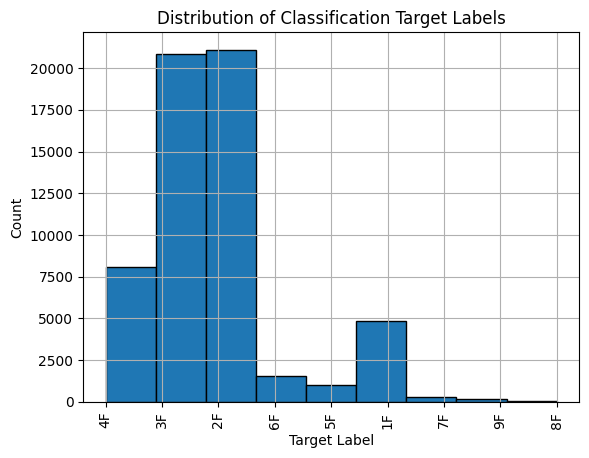

In [210]:
# Plot the distribution of target labels
plt.hist(y_train_floor, bins=len(set(y_train_floor)), edgecolor='black')
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.title('Distribution of Classification Target Labels')
plt.xticks(rotation=90)  # Rotate x-ticks if labels are long
plt.grid(True)
plt.show()

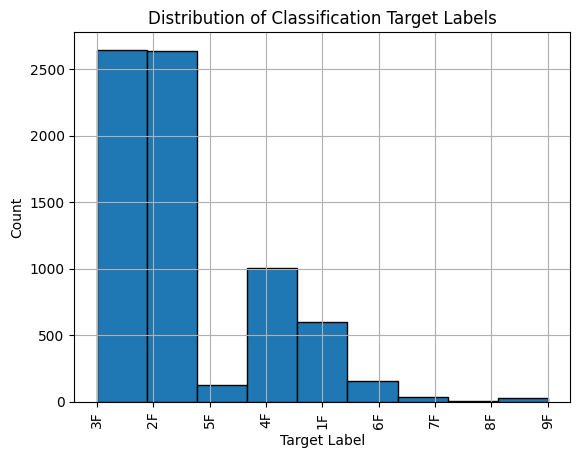

In [213]:
# Plot the distribution of target labels
plt.hist(y_val_floor, bins=len(set(y_val_floor)), edgecolor='black')
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.title('Distribution of Classification Target Labels')
plt.xticks(rotation=90)  # Rotate x-ticks if labels are long
plt.grid(True)
plt.show()

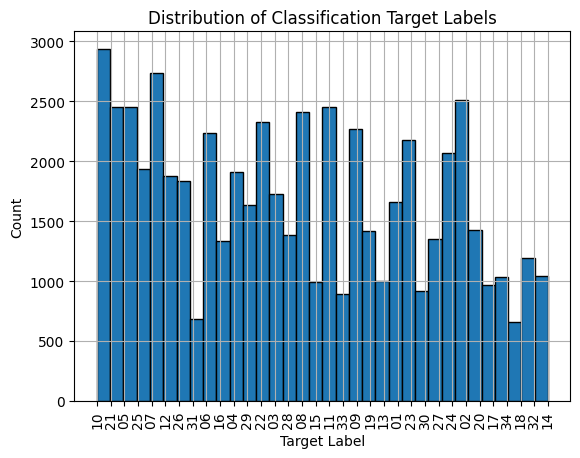

In [214]:
# Plot the distribution of target labels
plt.hist(y_train_room, bins=len(set(y_train_room)), edgecolor='black')
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.title('Distribution of Classification Target Labels')
plt.xticks(rotation=90)  # Rotate x-ticks if labels are long
plt.grid(True)
plt.show()

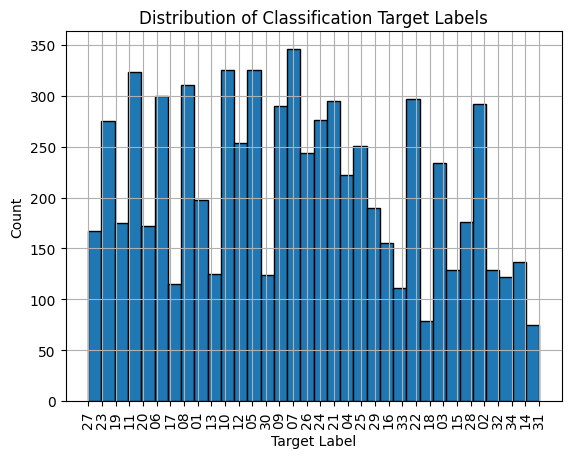

In [215]:
# Plot the distribution of target labels
plt.hist(y_val_room, bins=len(set(y_val_room)), edgecolor='black')
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.title('Distribution of Classification Target Labels')
plt.xticks(rotation=90)  # Rotate x-ticks if labels are long
plt.grid(True)
plt.show()

### Floor Prediction

#### SMOTE

In [231]:
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE pada data pelatihan untuk label 'floor'
smote = SMOTE(random_state=42)
x_train_res, y_train_floor_res = smote.fit_resample(x_train, y_train_floor)

#### Random Forest

In [232]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_res, y_train_floor_res)

y_pred = rf_model.predict(x_test)

              precision    recall  f1-score   support

          1F       0.83      0.97      0.89      1210
          2F       1.00      0.98      0.99      5264
          3F       0.98      0.87      0.92      5267
          4F       0.85      0.80      0.83      2004
          5F       0.51      0.66      0.58       261
          6F       0.65      0.77      0.70       339
          7F       0.18      0.77      0.29        75
          8F       0.08      1.00      0.14         6
          9F       0.26      0.79      0.39        52

    accuracy                           0.90     14478
   macro avg       0.59      0.85      0.64     14478
weighted avg       0.93      0.90      0.91     14478



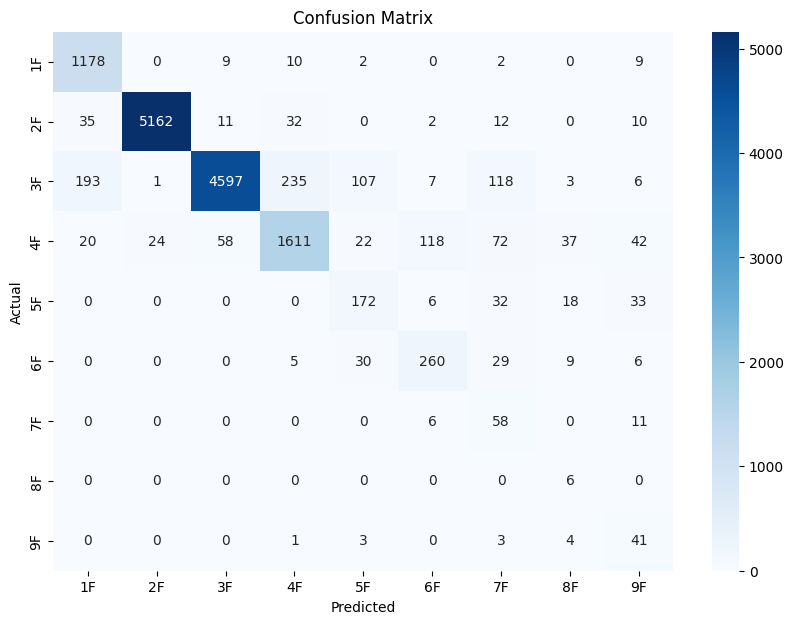

In [234]:
# Evaluasi hasil prediksi
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_test_floor, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test_floor, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### XGB

In [275]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train_floor)
y_test_encoded = label_encoder.transform(y_test_floor)  # Ensure test labels are also transformed

num_classes = len(set(y_train_encoded))

# Initialize and fit the model
bst = XGBClassifier(objective='multi:softmax', num_class=num_classes, eval_metric=['mlogloss', 'merror'])
bst.fit(x_train, y_train_encoded, eval_set=[(x_train, y_train_encoded), (x_test, y_test_encoded)], verbose=True)

[0]	validation_0-mlogloss:1.50664	validation_0-merror:0.25823	validation_1-mlogloss:1.50775	validation_1-merror:0.25805
[1]	validation_0-mlogloss:1.22465	validation_0-merror:0.22007	validation_1-mlogloss:1.22909	validation_1-merror:0.22400
[2]	validation_0-mlogloss:1.04266	validation_0-merror:0.20684	validation_1-mlogloss:1.04849	validation_1-merror:0.21287
[3]	validation_0-mlogloss:0.90299	validation_0-merror:0.19722	validation_1-mlogloss:0.90880	validation_1-merror:0.20334
[4]	validation_0-mlogloss:0.80253	validation_0-merror:0.18310	validation_1-mlogloss:0.80974	validation_1-merror:0.18946
[5]	validation_0-mlogloss:0.72879	validation_0-merror:0.17667	validation_1-mlogloss:0.73706	validation_1-merror:0.18428
[6]	validation_0-mlogloss:0.66730	validation_0-merror:0.17761	validation_1-mlogloss:0.67667	validation_1-merror:0.18469
[7]	validation_0-mlogloss:0.61589	validation_0-merror:0.15700	validation_1-mlogloss:0.62548	validation_1-merror:0.16314
[8]	validation_0-mlogloss:0.57805	valida

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss', 'merror'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=9, num_parallel_tree=None, ...)

In [276]:
# Make predictions
y_train_pred = bst.predict(x_train)
y_test_pred = bst.predict(x_test)
# Convert predictions back to original labels (if needed)
# y_pred_original = label_encoder.inverse_transform(y_pred)

In [277]:
from sklearn.metrics import accuracy_score

# Evaluate performance
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9341898495916006
Test Accuracy: 0.9290647879541373


In [278]:
# Generate classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))


Classification Report (Test Data):
              precision    recall  f1-score   support

          1F       0.96      0.87      0.91      1210
          2F       0.98      0.99      0.99      5264
          3F       0.93      0.96      0.94      5267
          4F       0.86      0.82      0.84      2004
          5F       0.65      0.61      0.63       261
          6F       0.70      0.76      0.73       339
          7F       1.00      0.21      0.35        75
          8F       0.00      0.00      0.00         6
          9F       0.46      0.63      0.53        52

    accuracy                           0.93     14478
   macro avg       0.73      0.65      0.66     14478
weighted avg       0.93      0.93      0.93     14478



c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

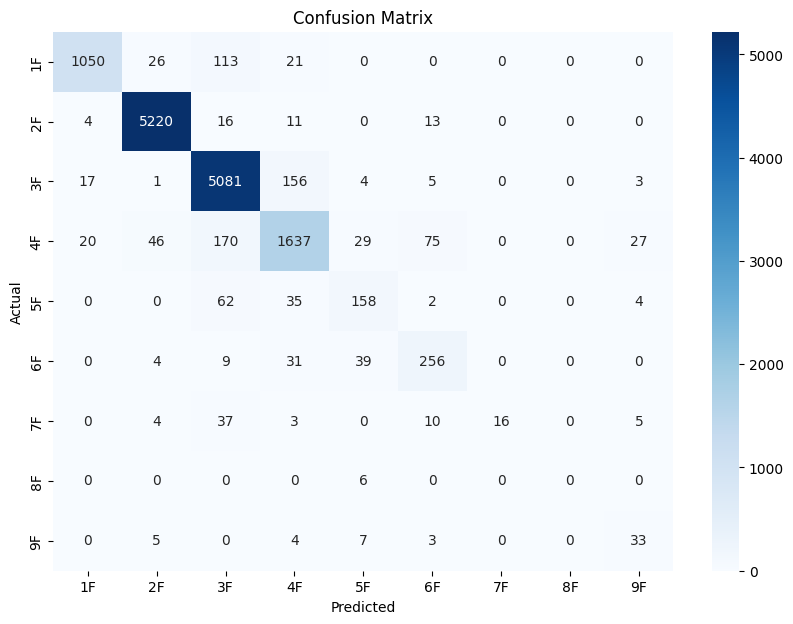

In [279]:
# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate performance
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9341898495916006
Test Accuracy: 0.9290647879541373


In [ ]:
# Generate classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))


Classification Report (Test Data):
              precision    recall  f1-score   support

          1F       0.96      0.87      0.91      1210
          2F       0.98      0.99      0.99      5264
          3F       0.93      0.96      0.94      5267
          4F       0.86      0.82      0.84      2004
          5F       0.65      0.61      0.63       261
          6F       0.70      0.76      0.73       339
          7F       1.00      0.21      0.35        75
          8F       0.00      0.00      0.00         6
          9F       0.46      0.63      0.53        52

    accuracy                           0.93     14478
   macro avg       0.73      0.65      0.66     14478
weighted avg       0.93      0.93      0.93     14478



c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

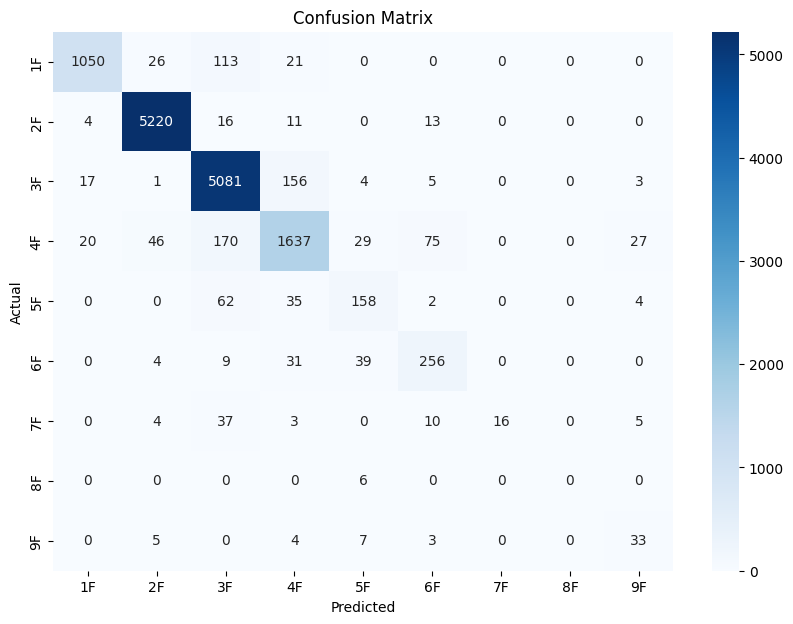

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

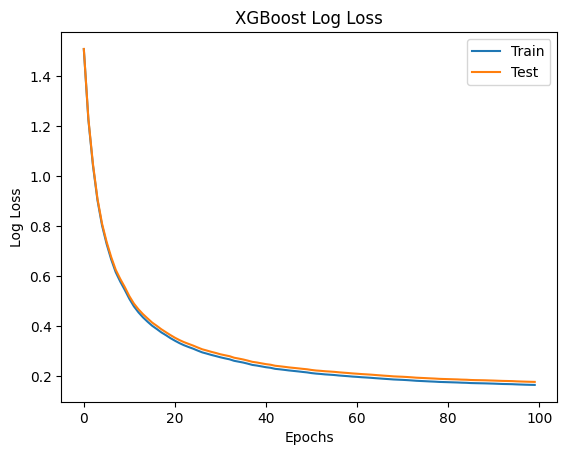

In [280]:
# Plot learning curves
results = bst.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# Plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

**Graph Interpretation**:

- Both the training and test log loss curves start high and decrease significantly, which indicates that the model is learning well from the data.
- The curves are very close to each other and eventually converge, indicating that the model is generalizing well to the test data and not overfitting.
- The log loss values are low towards the end of the training, suggesting good performance.

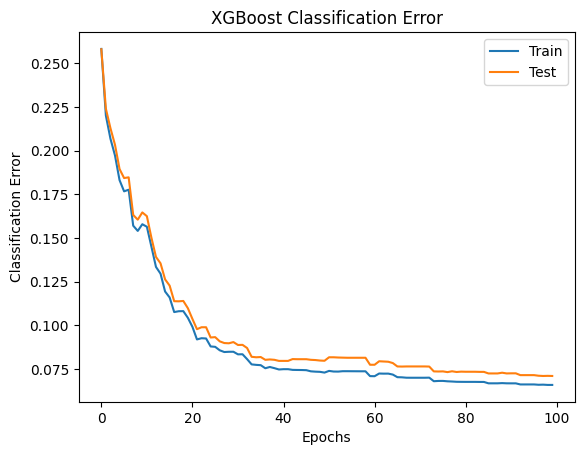

In [282]:
# Plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

**Confusion Matrix Analysis**

**XGBoost:**
- Higher precision in classes 1F, 2F, 3F.
- Some classes like 8F and 9F have very low performance due to imbalanced data or misclassification.

**Random Forest:**
- Higher recall in classes 7F, 8F, 9F.
- Generally performs well in classes with higher support but struggles with minority classes.

**Analysis for Rogue AP Detection Localization**

For rogue AP detection localization, precision and recall are crucial. Precision ensures that false positives (incorrect rogue AP detections) are minimized, and recall ensures that true rogue APs are not missed.
- **XGBoost** has **higher precision overall**, which means it is better at minimizing false positives.
- **Random Forest** has **higher recall**, particularly in minority classes, which means it is better at detecting true rogue APs.

**Decision Based on Use Case**
- If the primary goal is to **minimize false positives** (i.e., ensuring that detected rogue APs are truly rogue): **XGBoost** is better due to higher precision.
- If the primary goal is to **ensure that no rogue APs are missed** (i.e., maximizing detection of actual rogue APs): **Random Forest** is better due to higher recall.

Given these considerations, the choice of the model depends on the specific priority of rogue AP detection system:
- If minimizing false positives is more important: **XGBoost** is the preferred model.
- If maximizing detection (minimizing false negatives) is more important: **Random Forest** is the preferred model.

### Room Prediction

#### SMOTE

In [283]:
# Terapkan SMOTE pada data pelatihan untuk label 'room'
smote = SMOTE(random_state=42)
x_train_res, y_train_room_res = smote.fit_resample(x_train, y_train_room)

#### Random Forest

In [286]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_res, y_train_room_res)

y_pred = rf_model.predict(x_test)

              precision    recall  f1-score   support

          01       0.97      0.91      0.94       418
          02       0.92      0.90      0.91       582
          03       0.94      1.00      0.97       453
          04       1.00      0.97      0.98       452
          05       0.94      0.94      0.94       669
          06       1.00      0.96      0.98       599
          07       0.99      0.95      0.97       681
          08       0.99      0.97      0.98       616
          09       0.97      0.98      0.98       579
          10       0.93      0.79      0.85       673
          11       0.98      0.90      0.94       653
          12       0.97      0.92      0.94       484
          13       1.00      0.99      1.00       244
          14       0.84      0.99      0.91       263
          15       0.91      0.99      0.95       259
          16       0.88      0.88      0.88       326
          17       0.91      0.93      0.92       228
          18       1.00    

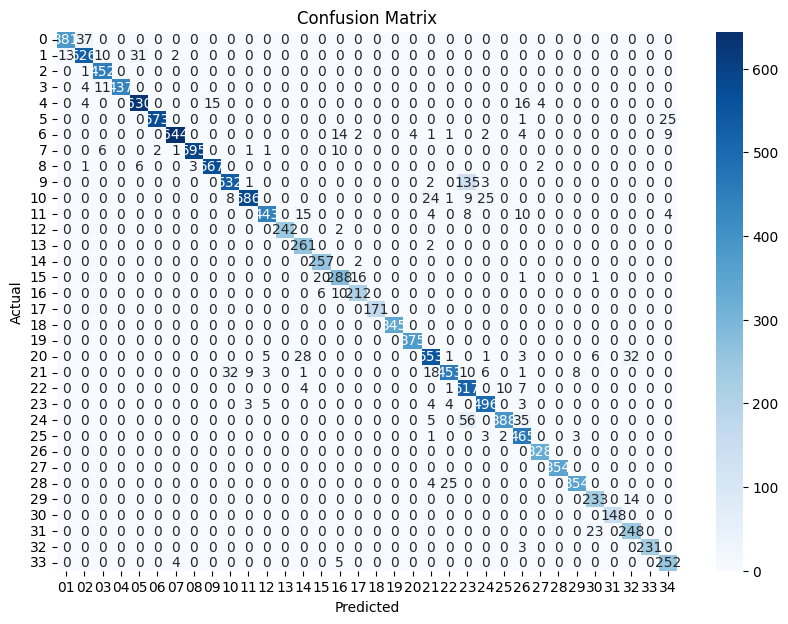

In [287]:
# Evaluasi hasil prediksi
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_test_room, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test_room, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### XGB

In [288]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train_room)
y_test_encoded = label_encoder.transform(y_test_room)  # Ensure test labels are also transformed

num_classes = len(set(y_train_encoded))

# Initialize and fit the model
bst = XGBClassifier(objective='multi:softmax', num_class=num_classes, eval_metric=['mlogloss', 'merror'])
bst.fit(x_train, y_train_encoded, eval_set=[(x_train, y_train_encoded), (x_test, y_test_encoded)], verbose=True)

[0]	validation_0-mlogloss:0.66758	validation_0-merror:0.09434	validation_1-mlogloss:0.66851	validation_1-merror:0.09725
[1]	validation_0-mlogloss:0.49329	validation_0-merror:0.07503	validation_1-mlogloss:0.49635	validation_1-merror:0.07812
[2]	validation_0-mlogloss:0.41130	validation_0-merror:0.07177	validation_1-mlogloss:0.41594	validation_1-merror:0.07605
[3]	validation_0-mlogloss:0.34970	validation_0-merror:0.06878	validation_1-mlogloss:0.35578	validation_1-merror:0.07335
[4]	validation_0-mlogloss:0.30654	validation_0-merror:0.06455	validation_1-mlogloss:0.31338	validation_1-merror:0.06866
[5]	validation_0-mlogloss:0.27354	validation_0-merror:0.06405	validation_1-mlogloss:0.28085	validation_1-merror:0.06769
[6]	validation_0-mlogloss:0.24725	validation_0-merror:0.06315	validation_1-mlogloss:0.25503	validation_1-merror:0.06755
[7]	validation_0-mlogloss:0.22797	validation_0-merror:0.06156	validation_1-mlogloss:0.23595	validation_1-merror:0.06610
[8]	validation_0-mlogloss:0.21220	valida

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss', 'merror'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=34, num_parallel_tree=None, ...)

In [289]:
# Make predictions
y_train_pred = bst.predict(x_train)
y_test_pred = bst.predict(x_test)
# Convert predictions back to original labels (if needed)
# y_pred_original = label_encoder.inverse_transform(y_pred)

In [290]:
from sklearn.metrics import accuracy_score

# Evaluate performance
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9422887634046522
Test Accuracy: 0.9374222958972234


In [291]:
# Generate classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))


Classification Report (Test Data):
              precision    recall  f1-score   support

          01       0.97      0.91      0.94       418
          02       0.92      0.90      0.91       582
          03       0.94      1.00      0.97       453
          04       1.00      0.97      0.98       452
          05       0.94      0.94      0.94       669
          06       0.96      1.00      0.98       599
          07       0.99      0.95      0.97       681
          08       0.99      0.98      0.98       616
          09       0.97      0.98      0.98       579
          10       0.79      0.95      0.86       673
          11       0.98      0.90      0.94       653
          12       0.97      0.92      0.94       484
          13       1.00      0.99      1.00       244
          14       1.00      0.97      0.98       263
          15       0.91      0.99      0.95       259
          16       0.90      0.87      0.88       326
          17       0.91      0.93      0.92  

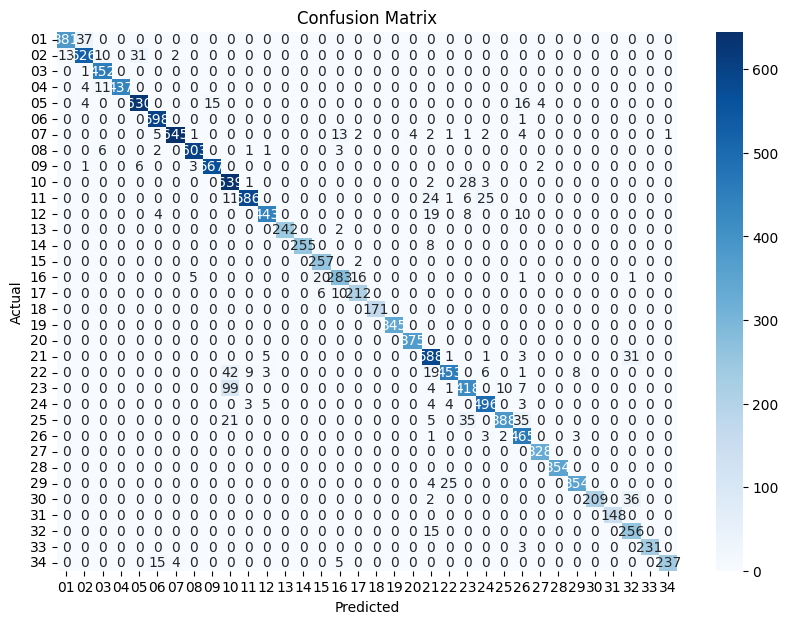

In [292]:
# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

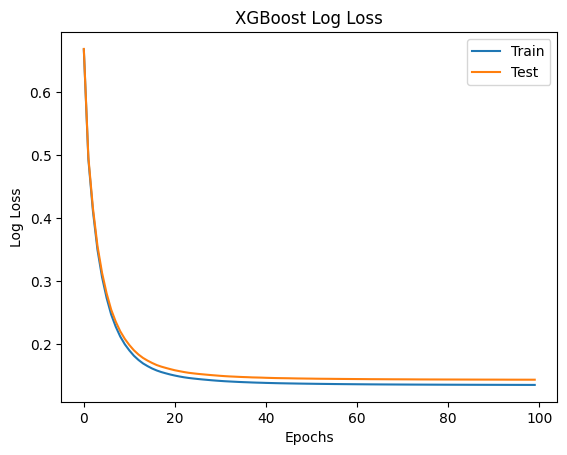

In [296]:
# Plot learning curves
results = bst.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# Plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

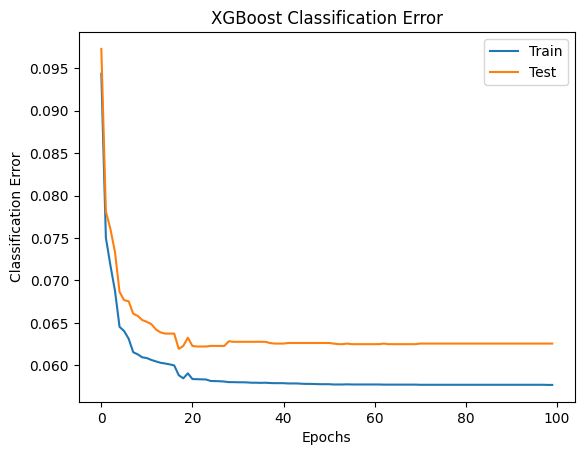

In [297]:
# Plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

Given the similar overall performance, **XGBoost** might be considered slightly better due to its **higher recall** in certain challenging classes (like class 10). However, **both models** perform **similarly well overall**, so the choice may depend on the specific priorities of your application (e.g., higher recall vs. higher precision in certain classes).